# Ford GoBike Data Exploration
## Britney Lovett

## Preliminary Wrangling

> Many cities have a bike sharing system to allow natives and visitors to roam the city freely without all the traffic buildup. San Francisco has a bike sharing system as described and this data is tracking individual rides around the area. The program is called GoBike and the bikes are manufactured by the company Ford, hence Ford GoBike. This dataset covers approximately 183K records.

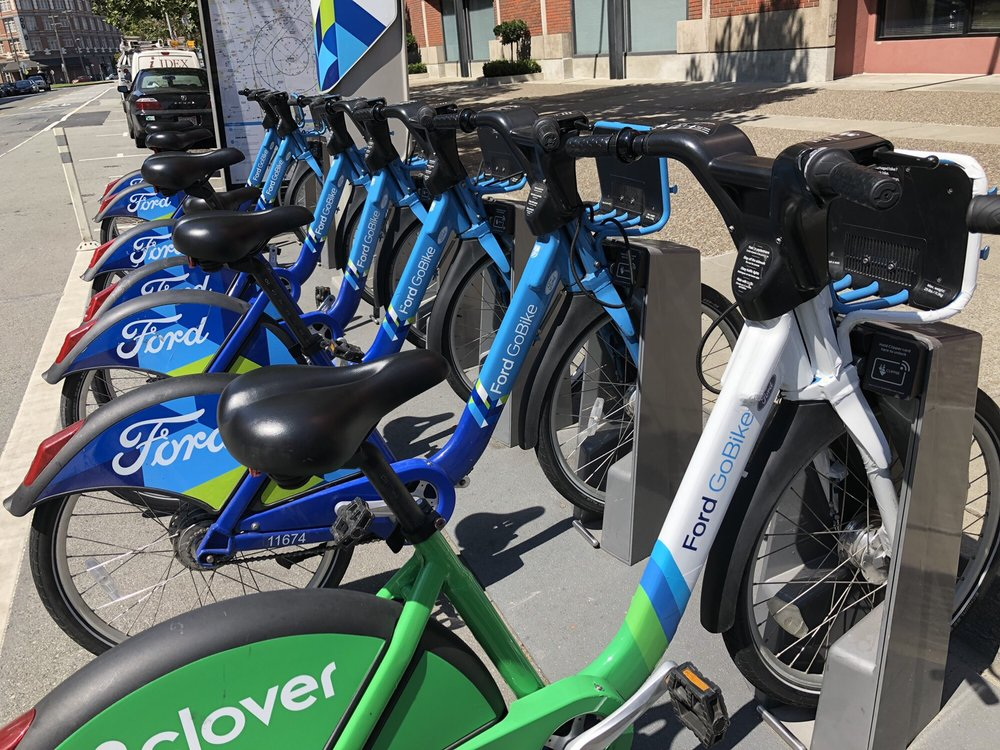

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

# Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# upload dataset
goBike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
goBike.head(5) #look at overall data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


# Assess the Data

In [4]:
goBike.describe() #look at overall stats for the dataset

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
goBike.info() #view dataset datatype setup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
goBike.groupby(['user_type']).size()  #overview of type of customer 

user_type
Customer       19868
Subscriber    163544
dtype: int64

In [7]:
goBike.groupby(['member_gender']).size() #overview of gender of customer 

member_gender
Female     40844
Male      130651
Other       3652
dtype: int64

In [8]:
goBike.groupby(['bike_share_for_all_trip']).size() #overview of activity of customer 

bike_share_for_all_trip
No     166053
Yes     17359
dtype: int64

In [9]:
goBike.isna().sum() #search for missing values

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# Clean Data

### There are several things that need tidying up for this dataset that we can fix. 

#### Datatypes:

    1. start_time and end_time are listed as object when they should have a datetime datatype
    2. start_station_id, end_station_id are listed as float when they should have a string datatype
    3. bike_id is listed as int when it should be listed as string. (we can't do any mathematical calculations with the bike_id field)
    
#### Missing values:

     As you can see above we have several fields with missing values. Where there is not start a station ID and no end station ID (meaning geographical location was not pulled in, could indicate the system had an issue and couldn't tell or perhaps rented and never taken anywhere). We will keep these NULL values. 


#### Statistical values:

    1. The max duration is 85,444 seconds which equates to 23 hours of rental time. Not saying it's impossible, but odd that someone had a 23 hour rental. 
    2. The min birth year is 1878. Not saying it's completely impossible, but unlikely that information is correct.
    3. The min ride duration is 61 seconds and seems off. Could be a customer changed their minds after renting. 


In [10]:
# Dataset copy before cleaning data to make sure we have original dataset
goBike_clean = goBike.copy()

#### 1. Define: start_time and end_time are listed as object when they should have a datetime datatype

#### Code: 

In [11]:
goBike_clean.start_time = pd.to_datetime(goBike_clean.start_time) #convert to datetime 
goBike_clean.end_time = pd.to_datetime(goBike_clean.end_time)

#### Test:

In [12]:
type('start_time') #check datatypes are changedt to datetime
type('end_time')

str

#### 2. Define: start_station_id, end_station_id are listed as float when they should have a string datatype

#### Code:

In [13]:
goBike_clean.start_station_id = goBike_clean.bike_id.astype(str) #convert to string
goBike_clean.end_station_id = goBike_clean.bike_id.astype(str)

#### Test:

In [14]:
type('start_station_id') #checking the datatypes are now string
type('end_station_id')

str

#### 3. Define: bike_id is listed as int when it should be listed as string. 

#### Code:

In [15]:
goBike_clean.bike_id = goBike_clean.bike_id.astype(str) #convert to string

#### Test:

In [16]:
type('bike_id') #check if datatype has changed to string

str

### What is the structure of your dataset?

> This dataset has 183,412 rows of data, 16 columns. We are analyzing a total of 183412 seconds of riding which equates to about 50 hours of ride time. The dataset is based on time and place with a few categorical variables such as user type, gender and bike share for all trips columns. The qualtiative data include mostly nominal data as they don't have a set order. 

### What is/are the main feature(s) of interest in your dataset?

> Interesting features about this dataset is where the most popular places for rental and drop off are around San Francisco. The distribution in age is also pretty interesting given the number of older adults in the dataset. In a bustling city I would assume age groups of 20-30, further exploration will confirm or reject this theory. Since there are more subscribers in the data set (versus customers) it will be interesting to see the difference in durations between the two groups. It would be interesting to know if subscribers have a longer duration than customers who do not subscribe to the service. What are some points of interest using end station data by age and gender?  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe looking into the data visually will help tell the complete picture of the interesting things about this dataset. Now that the data has the correct datatypes for each of the columns, we can look into the single variables first and then explore multiple variables at a time. Looking at the data by age, gender, start and end durations first and then combining this data with other data points will help address several of the questions I mentioned. I would love to know, <b> what is the most popular route for female and male visitors in San Fransisco? </b> I hope this will be helpful for those who have not yet visited San Franscico and is wondering where the hot spots are :)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

#### The first data point we will look at is the distribution of age. When we assess the data we could see this from the table, but I want to see it in more of a visual. 

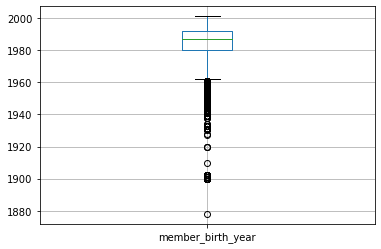

In [17]:
boxplot = goBike_clean.boxplot(column=['member_birth_year'])

In [18]:
print(goBike_clean[goBike_clean.member_birth_year == goBike_clean.member_birth_year.min()])

       duration_sec              start_time                end_time  \
27370          1474 2019-02-25 09:28:42.161 2019-02-25 09:53:17.068   

      start_station_id                                 start_station_name  \
27370             6436  San Francisco Ferry Building (Harry Bridges Pl...   

       start_station_latitude  start_station_longitude end_station_id  \
27370               37.795392              -122.394203           6436   

             end_station_name  end_station_latitude  end_station_longitude  \
27370  24th St at Bartlett St             37.752105            -122.419724   

      bike_id user_type  member_birth_year member_gender  \
27370    6436  Customer             1878.0        Female   

      bike_share_for_all_trip  
27370                      No  


Given that the Ford GoBike program started in June 2017 we shouldn't have many age values in the 1900s so it looks like we have some additional data to clean up. It's unlikely that so many people aged over age 100 rented bikes during this timeframe, but not <i>impossible</i>. You can see they are showing as outliers. San Francisco is a heavily populated area so it looks like the ages range on average from late 20s to late 30s. 

#### Gender is another area of interest worth investigating. Let's look at a visual breakdown that's easy to see the difference.

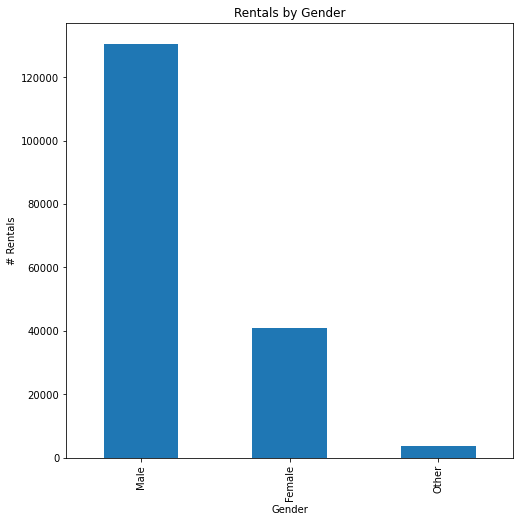

In [19]:
ax = goBike_clean['member_gender'].value_counts().plot(kind='bar',
                                    figsize=(8,8),
                                    title="Rentals by Gender")

plt.xlabel('Gender')
plt.ylabel('# Rentals')
plt.show()



Overall, men rent a significant amount more than women <b>(over 3x!)</b>. I wonder why that is? Could be lots of reasons including types of work around the city to safety reasons. That is not something I'll be able to dive into deeper today, but we can see the differences between returning customers (subscribers) and regular customers by gender. Are visitors more likely to be male or female that rent the bikes? We will explore this further later in the analysis.

#### Where are the most popular start and ending stations? 

Let's look at our most popular starting locations first.

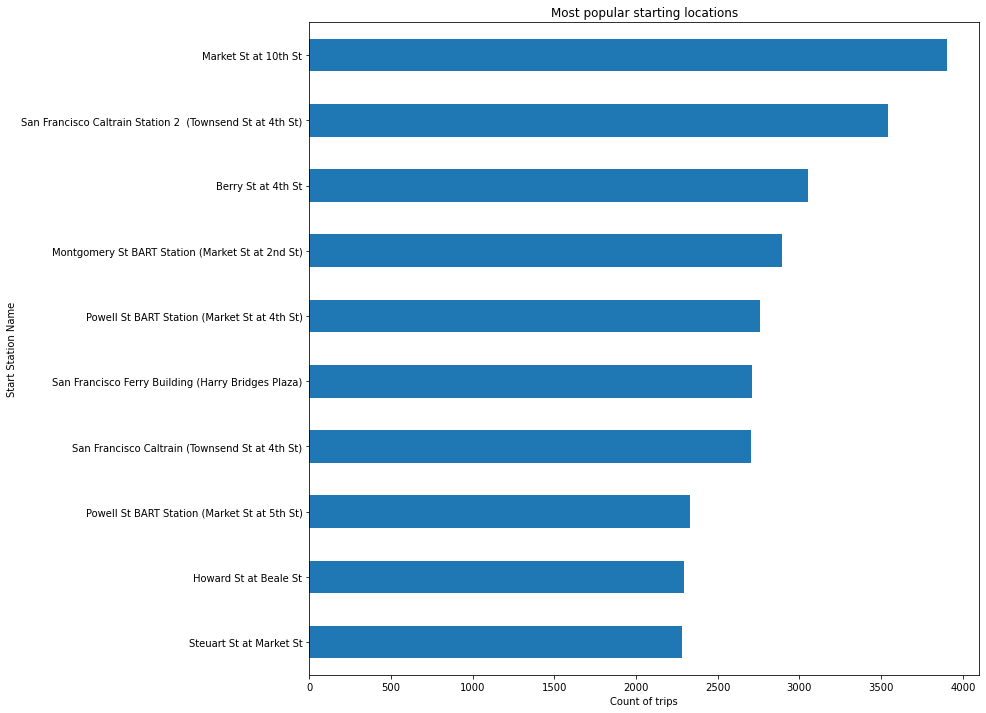

In [20]:
gb = goBike_clean['start_station_name'].value_counts().head(10).sort_values( ascending=True).plot(kind='barh',
                                    figsize=(12,12),
                                    title="Most popular starting locations")

plt.xlabel('Count of trips')
plt.ylabel('Start Station Name')
plt.show()

#### Now let's look at our most popular ending locations

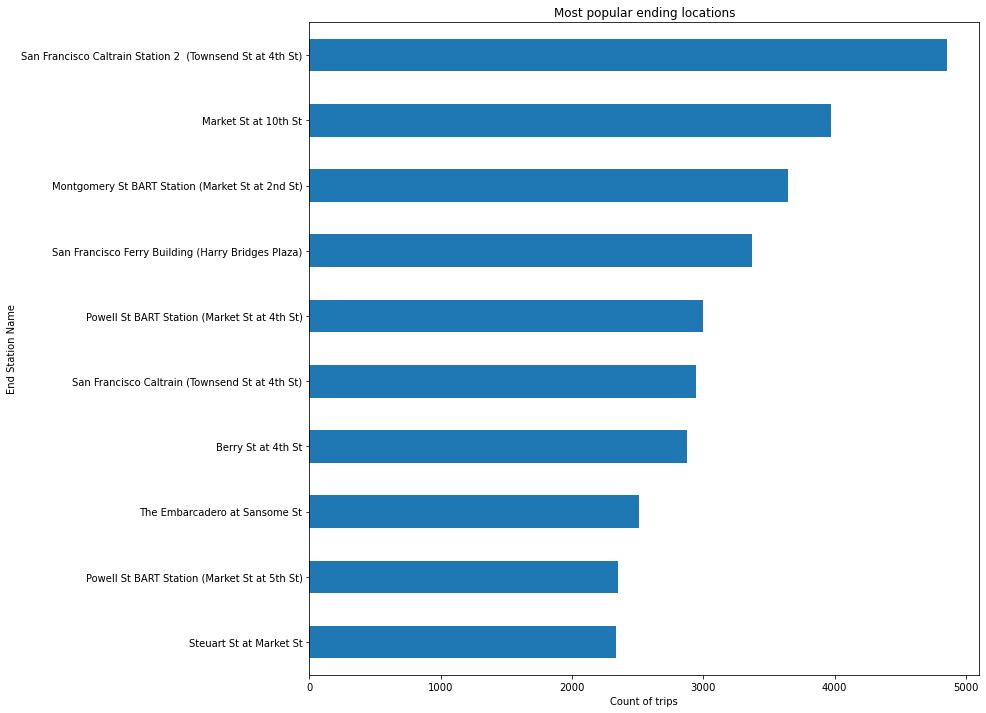

In [21]:
gb = goBike_clean['end_station_name'].value_counts().head(10).sort_values( ascending=True).plot(kind='barh',
                                    figsize=(12,12),
                                    title="Most popular ending locations")

plt.xlabel('Count of trips')
plt.ylabel('End Station Name')
plt.show()

So from what we can see Market St at 10th Street and San Francisco Caltrain Station 2 are the most popular starting and ending locations. 

#### Now, let's look at duration. How long are the rentals lasting between each user?

In [23]:
def myHistPlot(goBike_clean, xVar, bins=30, figsize=[14,6]):
    
    goBike_clean[xVar].hist(bins=bins,
                       grid=False,
                       edgecolor='black',
                        figsize=figsize);
    
    xVar=xVar.replace("_"," ")
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight="bold")
    

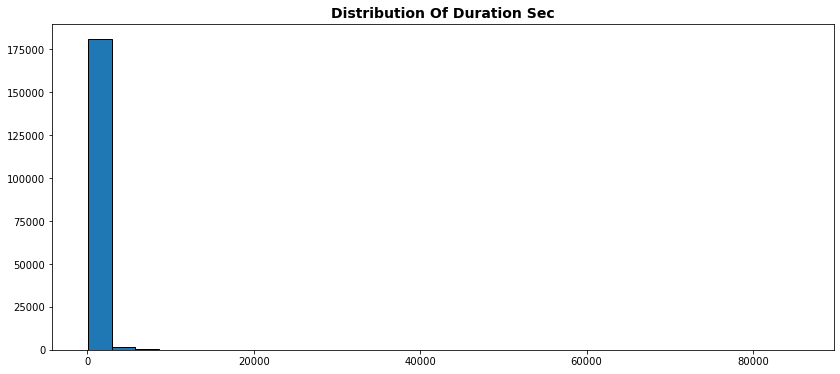

In [24]:
myHistPlot(goBike_clean,"duration_sec")

The above histogram is not widly helpful due to the outliers so we are going to narrow it down

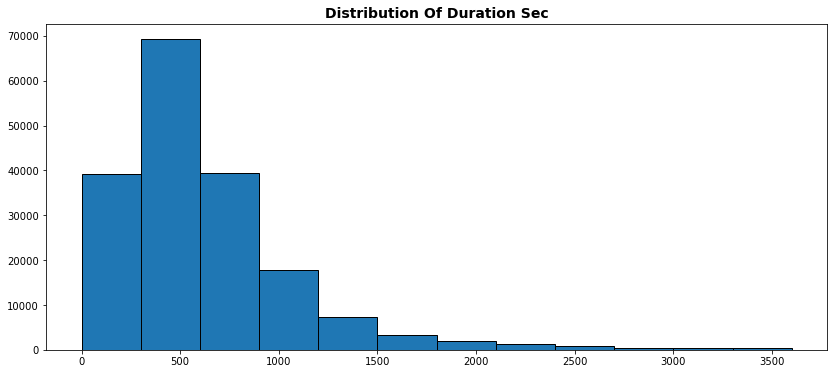

In [42]:
binsize=300
bin_edges=np.arange(0, goBike_clean['duration_sec'].quantile(0.99)+binsize,binsize)
myHistPlot(goBike_clean,"duration_sec", bins=bin_edges)

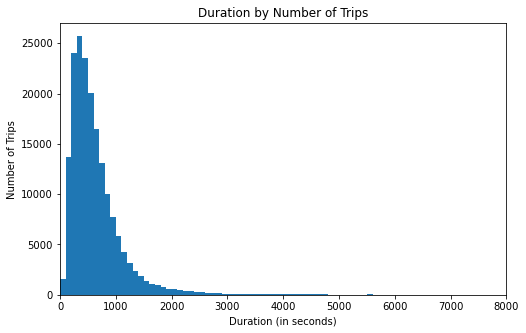

In [44]:
binsize=100
bin_edges=np.arange(0,goBike_clean['duration_sec'].max()+binsize,binsize)

plt.figure(figsize=[8,5])
plt.hist(data=goBike_clean,x='duration_sec',bins=bin_edges)
plt.xlabel('Duration (in seconds)')
plt.ylabel('Number of Trips')
plt.xlim(0,8000)
plt.title('Duration by Number of Trips')
plt.show()

The above graph has what's known as a long-tailed distribution, which means most of the bike rides only last a short time. You can see as time or duration gets longer there is less data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> So during analysis we did uncover some unusual data in the ages. There seem to be several outliers of older ages. I did not remove them from the dataset as I want to be sure those are incorrect or bad data, and I can't say 100%. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Performing the histogram on the duration I noticed the data was distributed one way. It helped to see the dataset clearer performing this analysis because now we know rentals last shorter times.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Earlier we looked at the individual breakdowns of age and duration. I want to inspect the relationship between two numeric variables, so I'm going to use a scatterplot. Let's see how these compare together.

Text(0.5, 1.0, 'Duration by Member Birth Year')

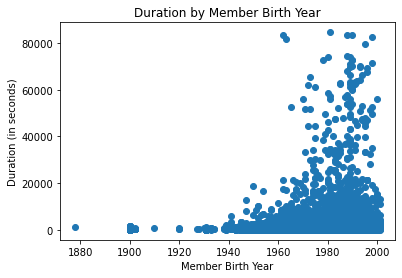

In [26]:
plt.scatter(data = goBike_clean, x = 'member_birth_year', y = 'duration_sec');
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (in seconds)')
plt.title("Duration by Member Birth Year")

A few things I noticed immediately. The weird outliers in age have very low duration further giving me the reasoning that this is bad data. Something else I noticed as the values on the x-axis increase, the values on the y-axis increase indicating a positive relationship. In this case the younger the ages get the higher the duration.   

Let's look at a few more pairs of data to determine any relationships.

#### Next, we can further look at gender and location. Do male and female start and end location trends differ? Since we have narrowed down the most popular start and end locations, what are the proprotions of male and female?

In [27]:
#top 10 stations
goBike_clean.groupby(['start_station_name']).size().sort_values(ascending=False).iloc[:10]

start_station_name
Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
dtype: int64

In [28]:
#store the name of the stations
stations=goBike_clean.groupby(['start_station_name']).size().sort_values(ascending=False).iloc[:10].index
stations

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Steuart St at Market St'],
      dtype='object', name='start_station_name')

In [29]:
#only use the top 10 stations stored
goBike_clean.query('start_station_name in @stations').groupby(['start_station_name','member_gender']).size()

start_station_name                                         member_gender
Berry St at 4th St                                         Female            815
                                                           Male             2095
                                                           Other              42
Howard St at Beale St                                      Female            506
                                                           Male             1682
                                                           Other              28
Market St at 10th St                                       Female            876
                                                           Male             2700
                                                           Other              73
Montgomery St BART Station (Market St at 2nd St)           Female            473
                                                           Male             2170
                                    

We can see by looking at the table above that females prefer the same start locations as the males. If you recall Market St at 10th Street was the most popular starting location and that's true for both males and females. 

In [30]:
goBike_clean.groupby(['end_station_name']).size().sort_values(ascending=False).iloc[:10]

end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
dtype: int64

In [31]:
stations=goBike_clean.groupby(['end_station_name']).size().sort_values(ascending=False).iloc[:10].index
stations

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St',
       'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St'],
      dtype='object', name='end_station_name')

In [32]:
goBike_clean.query('end_station_name in @stations').groupby(['end_station_name','member_gender']).size()

end_station_name                                           member_gender
Berry St at 4th St                                         Female            780
                                                           Male             1957
                                                           Other              45
Market St at 10th St                                       Female            878
                                                           Male             2758
                                                           Other              73
Montgomery St BART Station (Market St at 2nd St)           Female            686
                                                           Male             2689
                                                           Other              86
Powell St BART Station (Market St at 4th St)               Female            674
                                                           Male             2137
                                    

The most popular ending destiation we discovered earlier was San Franscisco Caltrain Station 2. This is the same for males and females. 

#### Next we will explore the relationship between the type of user (subscriber or regular customer) and duration. 

Text(0, 0.5, 'Duration (in seconds)')

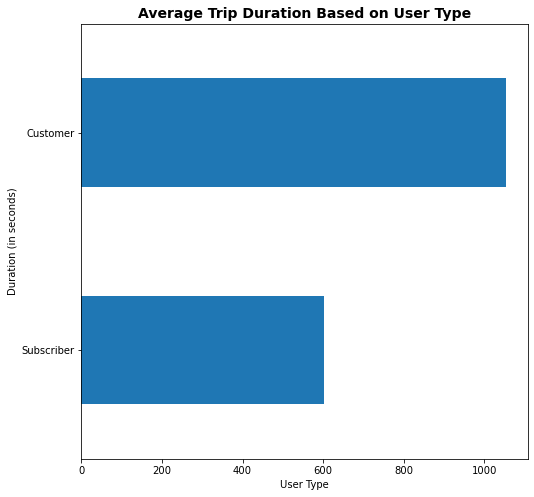

In [33]:
goBike_clean.query('duration_sec < 8000').groupby('user_type')['duration_sec'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.title('Average Trip Duration Based on User Type', fontsize=14, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration (in seconds)')


Customers have a longer trip duration that subscribers possibly subscribers are doing less sight seeing, get lost less frequently and know where they want to go. Customers may be 1st timers and need a few extra minutes figuring it out in the beginning. A subscribers average time is 10 minutes whereas a customer is 15 minutes.

#### Since we explored trip duration based on user type I'm curious as to these results based on gender. Let's explore further

Text(0, 0.5, 'Duration (in seconds)')

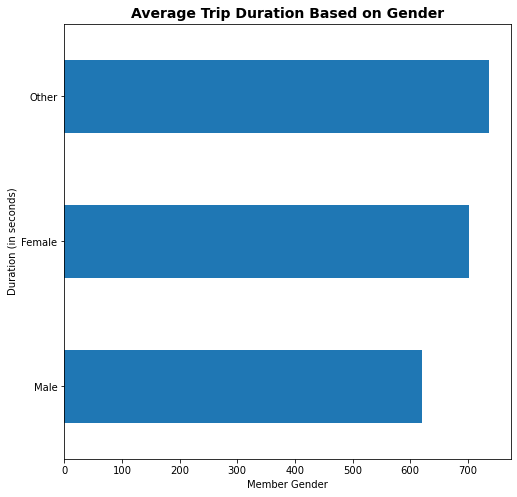

In [34]:
goBike_clean.query('duration_sec < 8000').groupby('member_gender')['duration_sec'].mean().sort_values(ascending=True).plot(kind='barh', figsize=(8,8))
plt.title('Average Trip Duration Based on Gender', fontsize=14, fontweight='bold')
plt.xlabel('Member Gender')
plt.ylabel('Duration (in seconds)')


I'm surprised to realize the average durations for females is slightly longer than males, only by a minute. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A few things that were intersting about the relationships. There is a positive correlation between age and duration. We noticed that the popular places for start and end are consistent among genders. Durations means are around the same with females holding only a slighly longer duration than the males. Also customers are likely to have longer trip times than subscribers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I mainly stuck to the areas of interest, but I was curious on the 'Other' gender category. Not only did this smaller category have different start and ending points, but also a wider range of anges and duration. 

## Multivariate Exploration

#### To do a larger review of our data we will look at the duration (in seconds) by year and gender. 

<AxesSubplot:title={'center':'Count of durations of Rentals by Gender and Birth Year'}, xlabel='Member Birth Year', ylabel='Duration'>

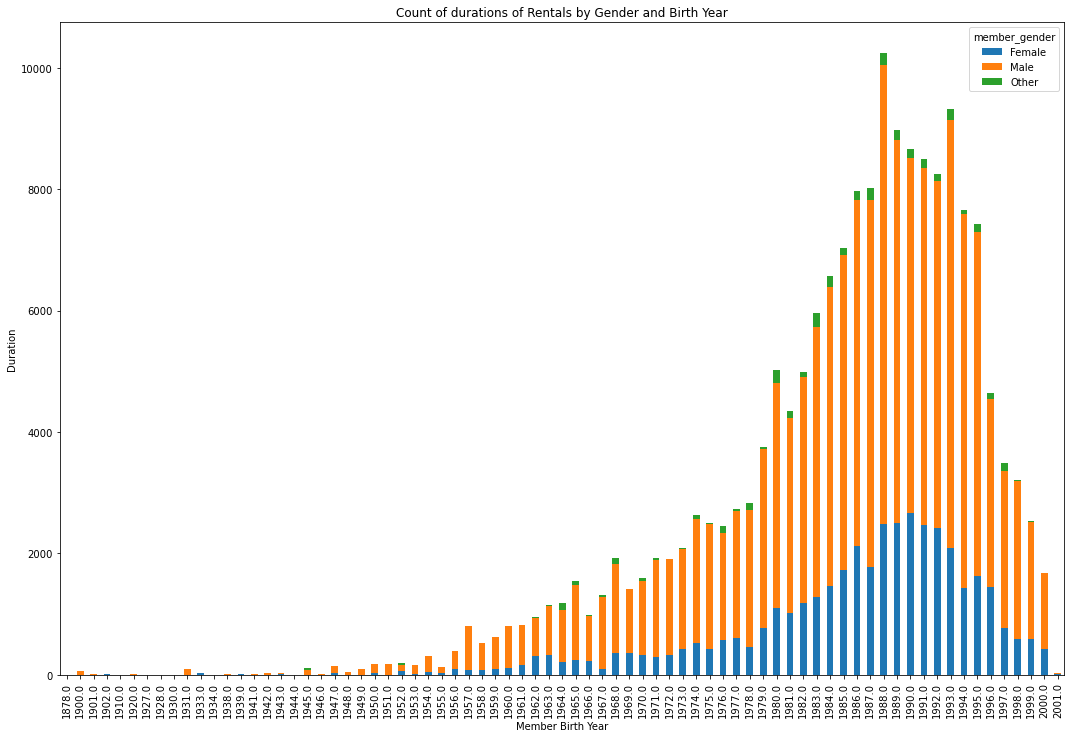

In [35]:
(goBike_clean.pivot_table(index='member_birth_year', columns='member_gender', values='duration_sec', aggfunc='count', fill_value=0)
.plot.bar(stacked=True, figsize=(18,12), ylabel = 'Duration', xlabel = 'Member Birth Year', title='Count of durations of Rentals by Gender and Birth Year')
 

)

#### We need to breakdown the time to get the days, months, start and end of the day

In [36]:
goBike_clean['duration_min']=goBike_clean['duration_sec']/60
goBike_clean['duration_hr']=goBike_clean['duration_min']/60
goBike_clean['duration_min']=goBike_clean['duration_min'].astype(float)
goBike_clean['duration_hr']=goBike_clean['duration_hr'].astype(float)


goBike_clean['start_month'] = goBike_clean.start_time.dt.month
goBike_clean['start_day'] = goBike_clean.start_time.dt.weekday 
goBike_clean['start_hour'] = goBike_clean.start_time.dt.hour

In [37]:
goBike_clean.head(5) #Look at revised dataset

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,start_month,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,869.750000,14.495833,2,3,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,708.683333,11.811389,2,3,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1030.900000,17.181667,2,3,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.166667,10.136111,2,3,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,2,3,23


Text(0.5, 1.0, 'Mean Trip Duration by Day of Week')

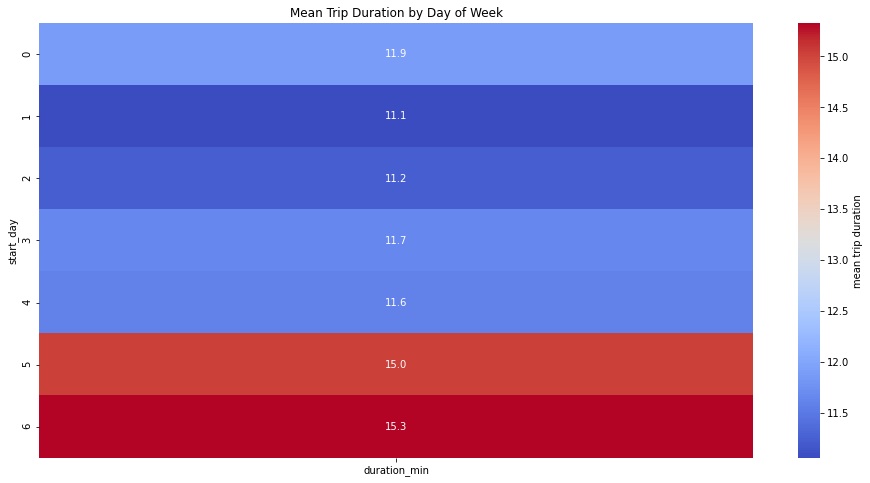

In [38]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day')
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week")

Looking at this chart we can see the most popular days on average for trip durations are the weekends Saturdays and Sundays with Sunday being slightly longer

#### To further look into this analysis, let's break it up by gender and customer type

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week by Gender')

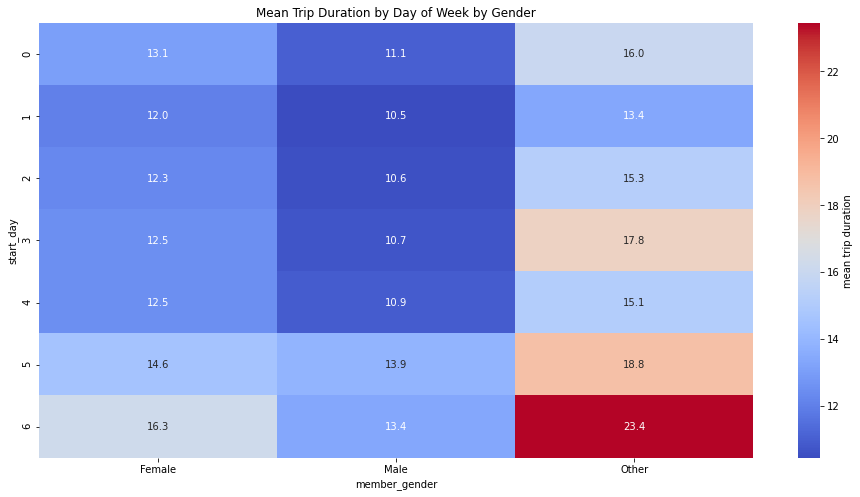

In [39]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day', columns="member_gender")
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week by Gender")

Text(0.5, 1.0, 'Mean Trip Duration by Day of Week by User Type')

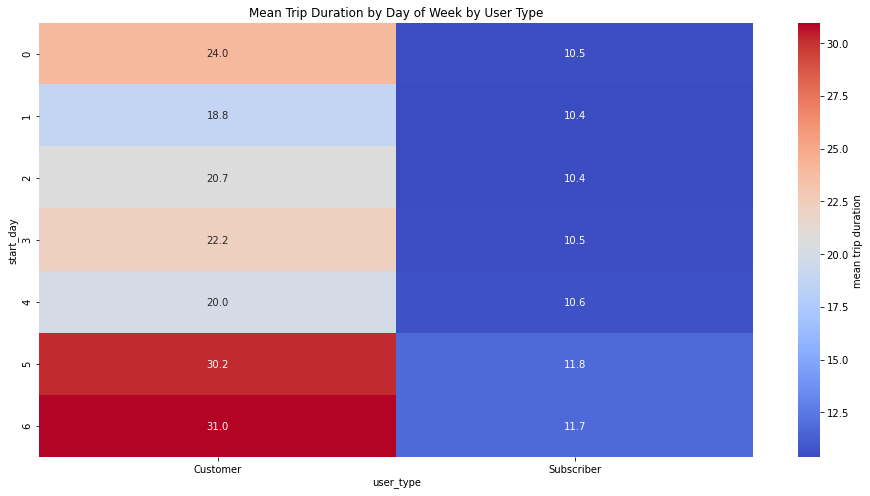

In [40]:
pivot = goBike_clean.pivot_table(values='duration_min', index='start_day', columns="user_type")
plt.figure(figsize=(16,8))
sns.heatmap(pivot,annot=True,fmt='.1f',cbar_kws={'label' : 'mean trip duration'}, cmap='coolwarm')
plt.title("Mean Trip Duration by Day of Week by User Type")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationships between gender, year, and duration are all consistent between what we have been discovering throughout this analysis. Females take less trips overall, there are also more male bike riders than female. The 'other' gender category is much smaller, but still representing a small group of durations. 

### Were there any interesting or surprising interactions between features?

> The count of durations are higher for men and women as the age groups get younger and then trail down again as the age gets down under 20. There are most likely age ranges (minimum age) for the bike rentals so that's why we see it cut off sharply at year 2001. Having additional historical data would give an even greater analysis on trends in this dataset. The times of the day for the most activity was interesting. The 'other' gender category had a strong average on Sundays for duration. I wonder if there are special events in the area that draw a specific crowd. Subscribers have a low duration on any day of the week including weekends, but customers who are not subscribers have a strong average over the weekends. 